In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math 
from utils.io import baumWelch

In [3]:
# Function for Encoding Game Quality 
def gameEncoding(x,conditions):
    if x <= conditions[0]:
        out = 0
    if (x > conditions[0]) and (x <= conditions[1]):
        out = 1
    if x > conditions[1]:
        out = 2
    return out


def load_data(file):
    
    # Load Data
    data = pd.read_csv(file)
    
    # Fill Nas with 0
    data.fillna(0,inplace=True)
    
    # Locate players who actually played and had more than 0 seconds 
    gameData = data.loc[(data.did_not_play == 0) & (data.seconds_played > 0)].copy()

    # Check if games played is more than 5
    playerGames = gameData.groupby("name").count()["did_not_play"] >= 5

    # Clean It up and perpare columns for custom index
    gameData = gameData[gameData['name'].isin(playerGames[playerGames==True].index)]
    indexCols = ["field_goal_pct","threePT_pct","free_throws_pct","trb",'assists', 'steals', 'blocks','points']
    
    # Create GameValueIndex
    gameData['GameValueIndex'] = (gameData.loc[:,indexCols].sum(axis = 1) -gameData.loc[:,"turnovers"])/gameData["seconds_played"]
    
    # Quantiles for Game Quality assignment
    conditions= [np.quantile(gameData['GameValueIndex'],0.3),np.quantile(gameData['GameValueIndex'],0.7)]
    
    # 
    gameData["gameQuality"] = gameData["GameValueIndex"].apply(lambda x: gameEncoding(x,conditions))
     
    # Return Data Frame
    return gameData

In [5]:
data1718 = load_data("../data/Players_Data_2017_18.csv")
data1819 = load_data("../data/Players_Data_2018_19.csv")

In [6]:
data1718.head()

,Unnamed: 0,name,did_not_play,date,team,opponent,home_away,game_start,seconds_played,field_goal_pct,...,trb,assists,steals,blocks,turnovers,points,game_score,plus_minus,GameValueIndex,gameQuality
0,0,Alex Abrines,0,2017-10-19,OKC,NYK,0,0.0,1455.0,0.200,...,3.0,0.0,1.0,0.0,2.0,3.0,-1.4,23.0,0.003711,0
1,1,Alex Abrines,0,2017-10-21,OKC,UTA,1,0.0,1744.0,0.333,...,4.0,1.0,1.0,0.0,0.0,7.0,6.9,6.0,0.008362,0
2,2,Alex Abrines,0,2017-10-22,OKC,MIN,0,0.0,860.0,1.000,...,0.0,0.0,1.0,0.0,0.0,4.0,2.8,13.0,0.006977,0
3,3,Alex Abrines,0,2017-10-25,OKC,IND,0,0.0,806.0,0.400,...,2.0,1.0,1.0,0.0,0.0,5.0,3.8,5.0,0.012903,1
4,4,Alex Abrines,0,2017-10-27,OKC,MIN,1,0.0,507.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.9,9.0,0.000000,0


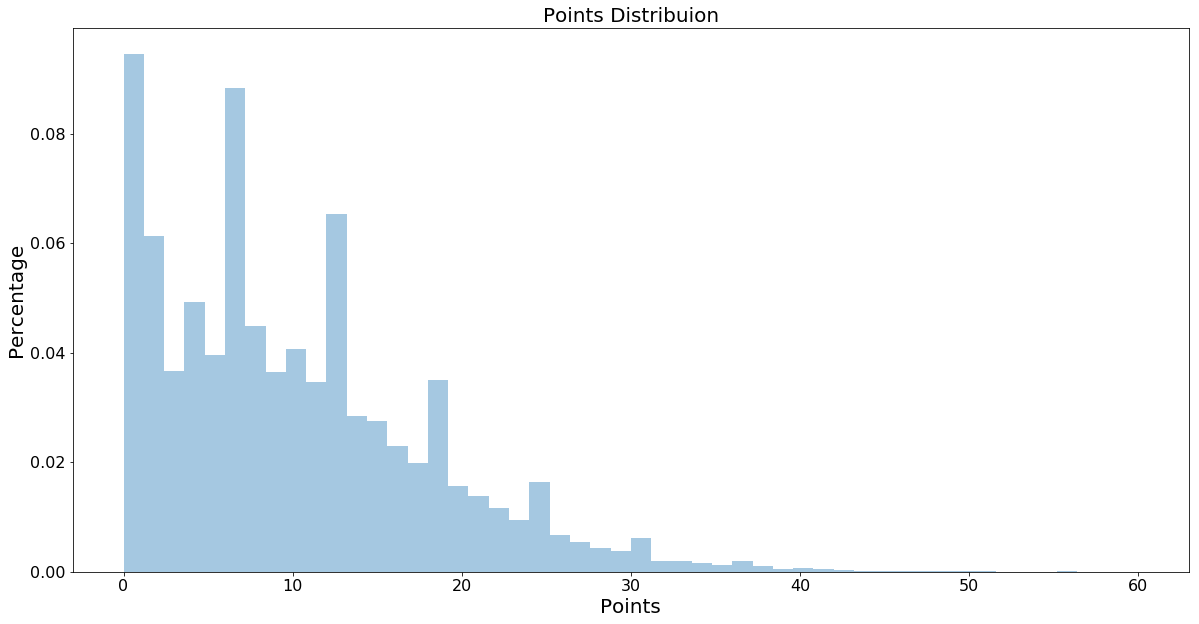

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(data1718["points"],kde = False, norm_hist=True)
ax.tick_params(labelsize=16)
ax.set_title("Points Distribuion", size=20)
ax.set_ylabel("Percentage", size=20)
ax.set_xlabel("Points", size=20)

fig.savefig("../report/plots/Points_Distribution", dpi=80)

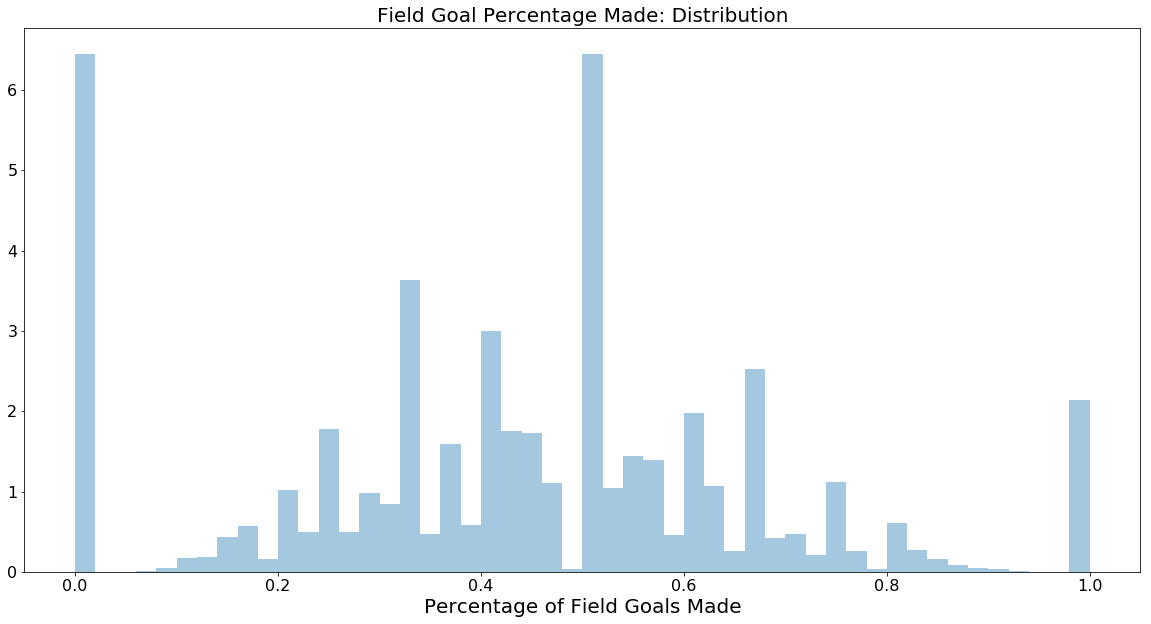

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(data1718["field_goal_pct"],kde = False, norm_hist=True)
ax.tick_params(labelsize=16)
ax.set_title("Field Goal Percentage Made: Distribution", size=20)
ax.set_ylabel("", size=20)
ax.set_xlabel("Percentage of Field Goals Made", size=20)

fig.savefig("../report/plots/FG_Percent_Distribution", dpi=80)


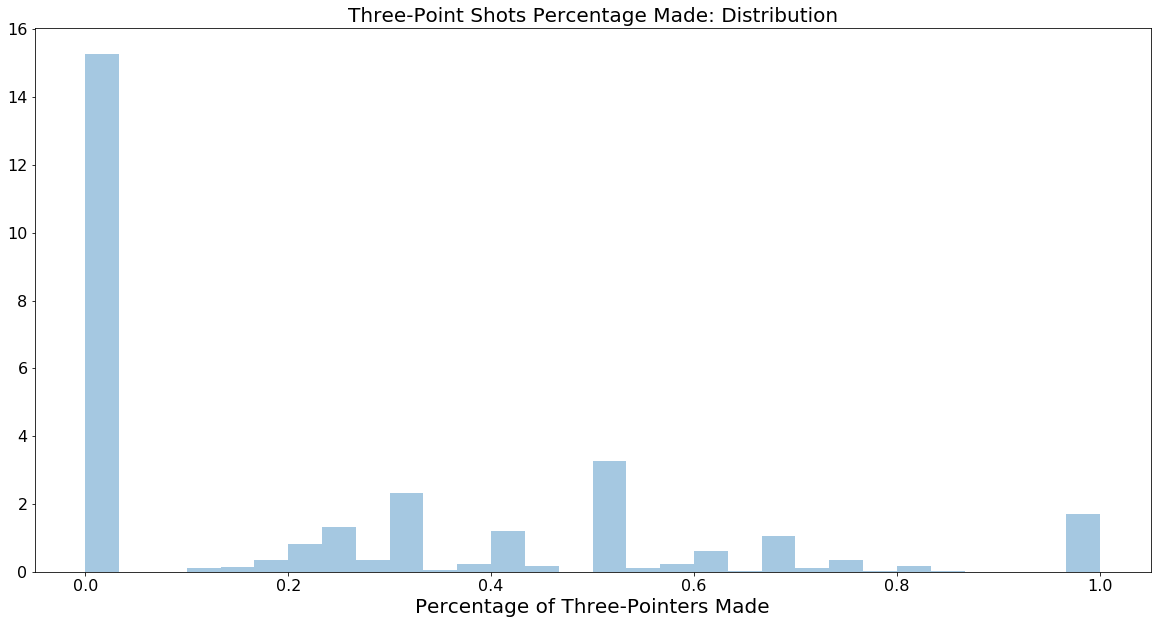

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(data1718["threePT_pct"],kde = False, norm_hist=True)
ax.tick_params(labelsize=16)
ax.set_title("Three-Point Shots Percentage Made: Distribution", size=20)
ax.set_ylabel("", size=20)
ax.set_xlabel("Percentage of Three-Pointers Made", size=20)

fig.savefig(f"../report/plots/3Pt_Percent_Distribution", dpi=80)

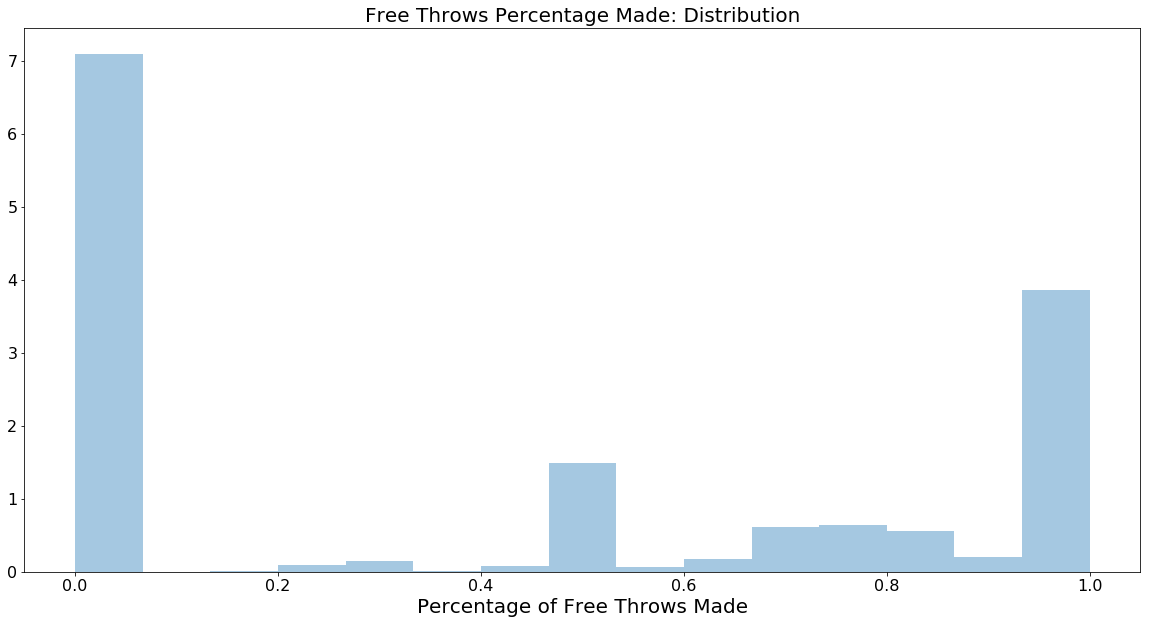

In [21]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(data1718["free_throws_pct"],kde = False, norm_hist=True)

ax.tick_params(labelsize=16)
ax.set_title("Free Throws Percentage Made: Distribution", size=20)
ax.set_ylabel("", size=20)
ax.set_xlabel("Percentage of Free Throws Made", size=20)

fig.savefig(f"../report/plots/Free_Throw_Percent_Distribution", dpi=80)

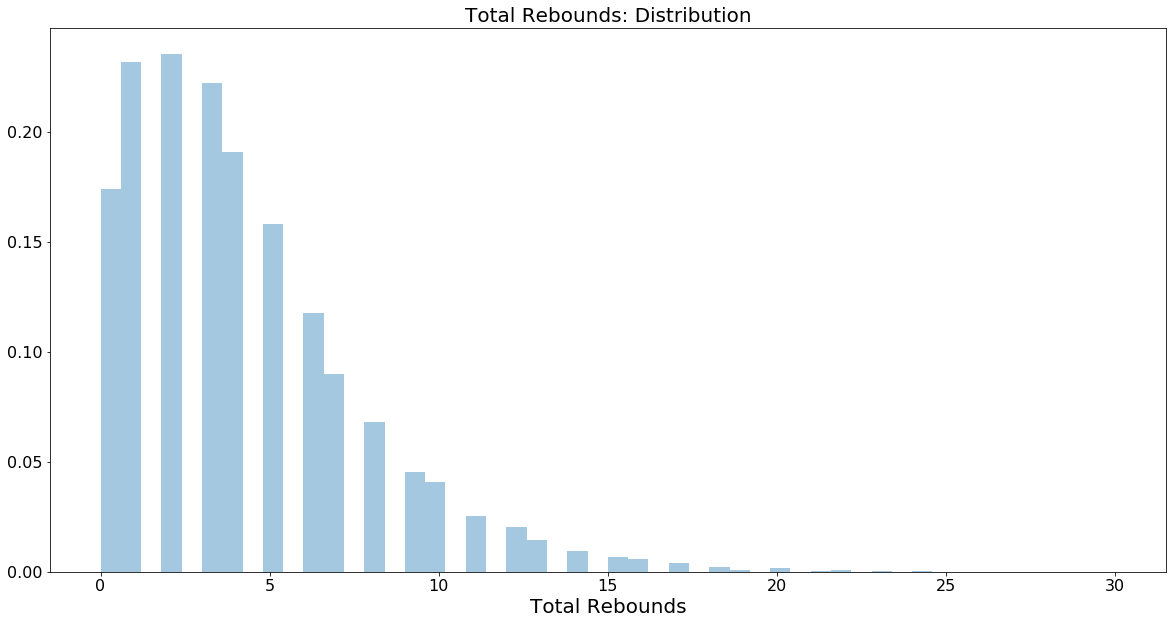

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(data1718["trb"],kde = False, norm_hist=True)

ax.tick_params(labelsize=16)
ax.set_title("Total Rebounds: Distribution", size=20)
ax.set_ylabel("", size=20)
ax.set_xlabel("Total Rebounds", size=20)

fig.savefig(f"../report/plots/Rebounds_Distribution", dpi=80)

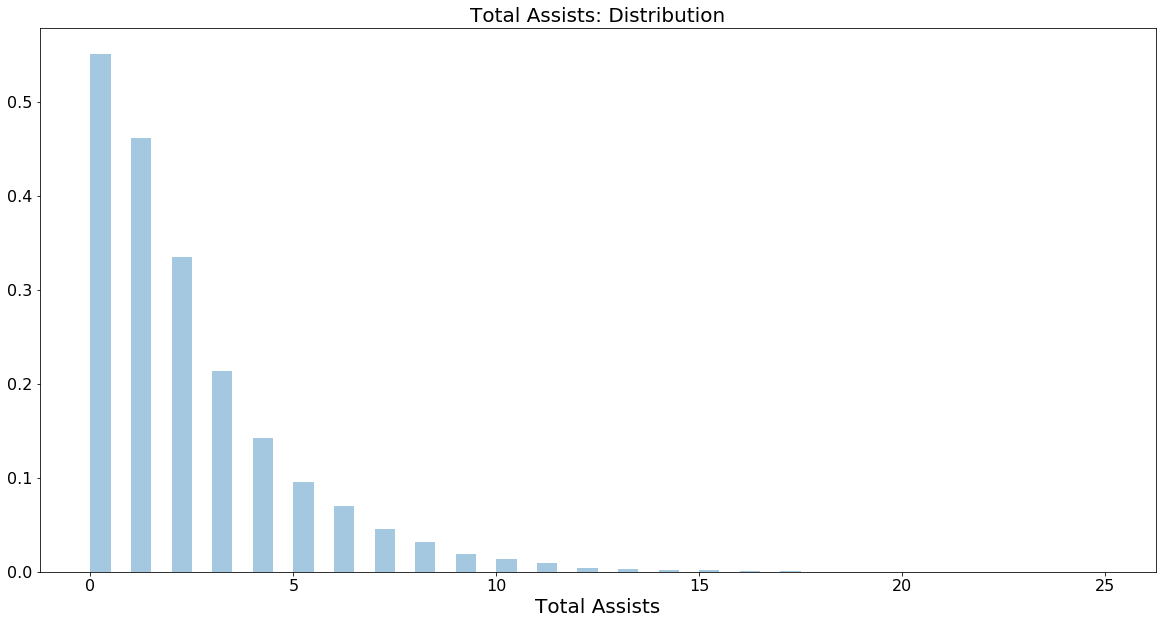

In [28]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(data1718["assists"],kde = False, norm_hist=True)
ax.tick_params(labelsize=16)
ax.set_title("Total Assists: Distribution", size=20)
ax.set_ylabel("", size=20)
ax.set_xlabel("Total Assists", size=20)

fig.savefig(f"../report/plots/Assists_Distribution", dpi=80)

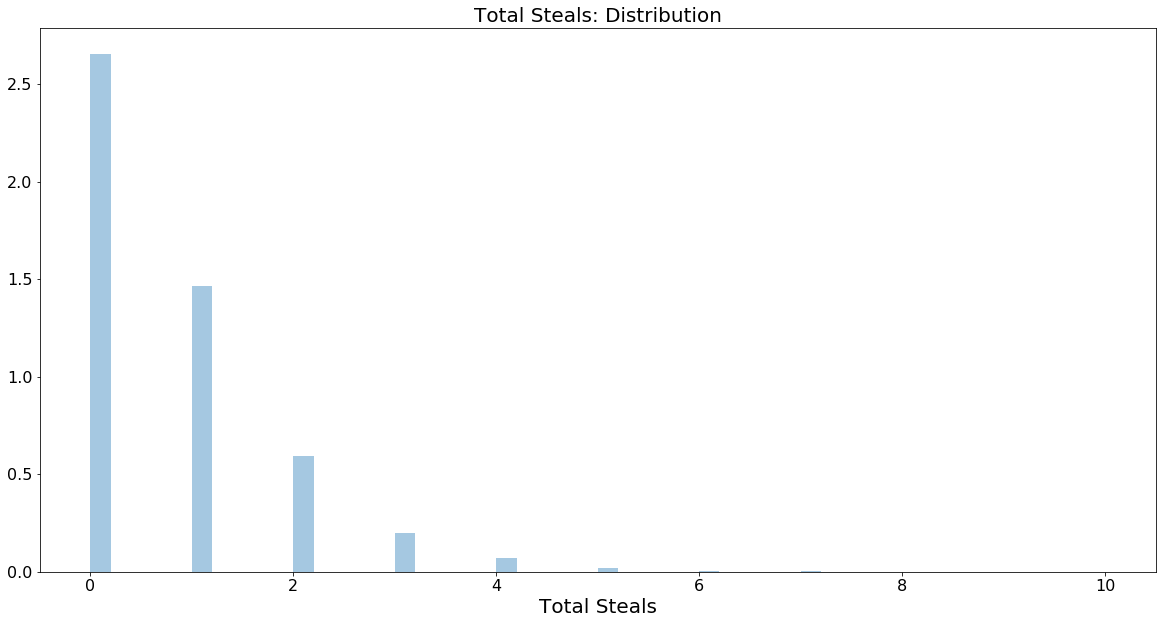

In [27]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(data1718["steals"],kde = False, norm_hist=True)
ax.tick_params(labelsize=16)
ax.set_title("Total Steals: Distribution", size=20)
ax.set_ylabel("", size=20)
ax.set_xlabel("Total Steals", size=20)

fig.savefig(f"../report/plots/Steals_Distribution", dpi=80)

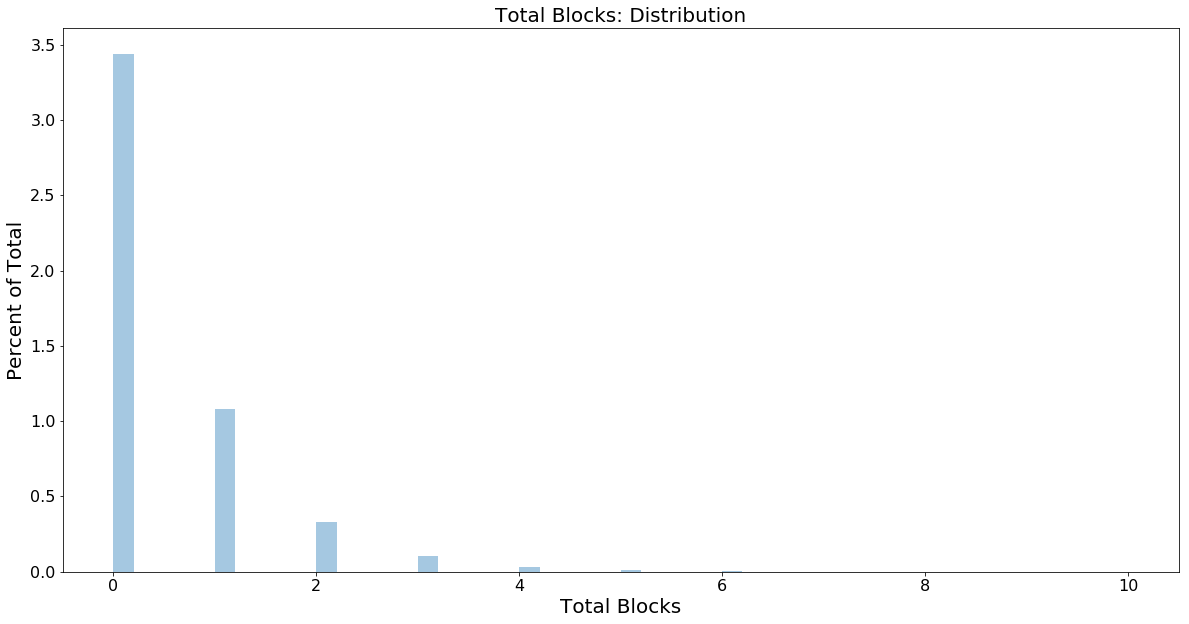

In [30]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(data1718["blocks"],kde = False, norm_hist=True)
ax.tick_params(labelsize=16)
ax.set_title("Total Blocks: Distribution", size=20)
ax.set_ylabel("Percent of Total", size=20)
ax.set_xlabel("Total Blocks", size=20)

fig.savefig(f"../report/plots/Blocks_Distribution", dpi=80)

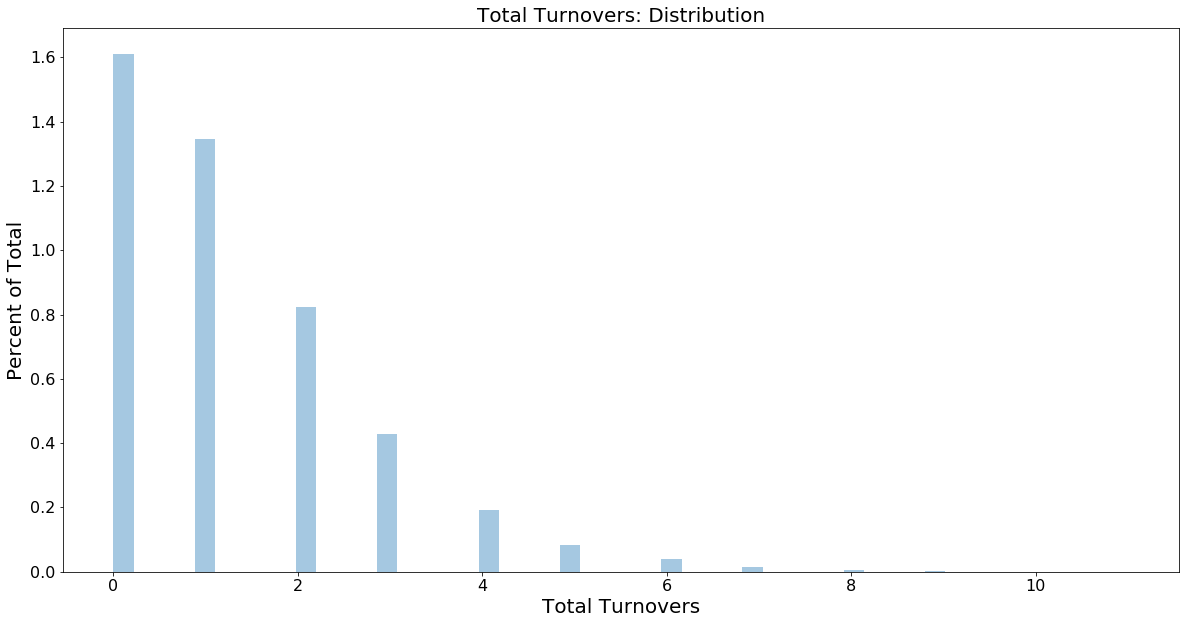

In [31]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(data1718["turnovers"],kde = False, norm_hist=True)
ax.tick_params(labelsize=16)
ax.set_title("Total Turnovers: Distribution", size=20)
ax.set_ylabel("Percent of Total", size=20)
ax.set_xlabel("Total Turnovers", size=20)

fig.savefig(f"../report/plots/Turnovers_Distribution", dpi=80)

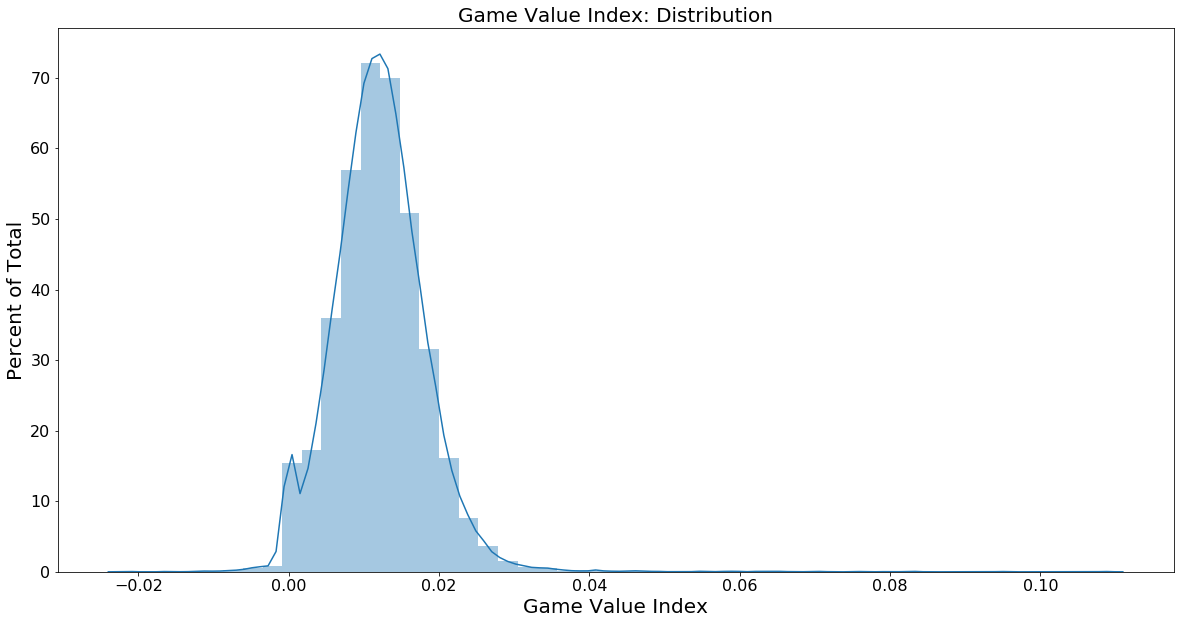

In [32]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(data1718["GameValueIndex"],kde = True, norm_hist=True)
ax.tick_params(labelsize=16)
ax.set_title("Game Value Index: Distribution", size=20)
ax.set_ylabel("Percent of Total", size=20)
ax.set_xlabel("Game Value Index", size=20)

fig.savefig(f"../report/plots/gamevalueIndex", dpi=80)

In [17]:
print("Total observations in 2017-18 season:", len(data1718))

Total observations in 2017-18 season: 26003


In [37]:
print("Total observations in 2018-19 season:", len(data1819))

Total observations in 2018-19 season: 20228


In [41]:
print("Total players in 2017-18 season:", len(data1718.loc[:,"name"].unique()))

Total players in 2017-18 season: 497


In [42]:
print("Total players in 2018-19 season:", len(data1819.loc[:,"name"].unique()))

Total players in 2018-19 season: 387
